In [1]:
import pandas as pd
import numpy as np

# 1. Load the data
Find a way to load the data into a pandas dataframe. You can find the data here: https://osf.io/fv8c3.

In [2]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [3]:
df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146023,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,0.00,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146024,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146025,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,0.25,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146026,yassine-el-ghanassi,Yassine El Ghanassi,West Bromwich Albion,England,12.07.1990,173.0,NaN,Left Winger,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968


In [4]:
df.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

In [5]:
df.shape

(146028, 28)

# 2. Clean the data
Here we use a very simple approach to clean the data. We remove all the rows that contain missing values. You can use a more sophisticated approach if you want.

In [6]:
df = df.dropna()
df.shape

(115457, 28)

In [7]:
len(df)

115457

# 3. Simple statistics
Calculate the mean, median, min and maximum values for all columns.

In [8]:
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,115457.000000,1.154570e+05,1.154570e+05,115457.000000,1.154570e+05,115457.000000
mean,182.176135,76.517413,3.033761,1.371506,0.721134,0.941121,0.360351,0.404592,0.012290,0.012801,0.261946,0.300796,1532.497363,29.367124,0.348564,1.772543e+04,6.292873e-04,0.466222,1.837261e+04,0.002993
std,6.855077,7.187210,3.641059,1.918978,1.155027,1.433641,0.960867,0.831051,0.112127,0.114175,0.294666,0.291061,916.310481,27.981717,0.032004,1.260788e+05,4.801956e-03,0.219350,1.295339e+05,0.019733
min,161.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,178.000000,72.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.335967,1.897000e+03,0.000225
50%,183.000000,76.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1579.000000,15.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2337.000000,45.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


df.describe() did not calculate the median for us. Let's do it manually.
First, find all numeric columns.

In [9]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'rater1', 'rater2', 'refNum',
       'refCountry', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'],
      dtype='object')

Next, select the numeric columns.

In [10]:
df[numeric_columns].head()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,177.0,72.0,1,0,0,1,0,0,0,0,0.25,0.50,1,1,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,179.0,82.0,1,0,0,1,0,1,0,0,0.75,0.75,2,2,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
5,182.0,71.0,1,0,0,1,0,0,0,0,0.25,0.00,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,187.0,80.0,1,1,0,0,0,0,0,0,0.00,0.25,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,180.0,68.0,1,0,0,1,0,0,0,0,1.00,1.00,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752


Finally, calculate the median.

In [11]:
df[numeric_columns].median()  # by default column-wise!

height          183.000000
weight           76.000000
games             1.000000
victories         1.000000
ties              0.000000
defeats           1.000000
goals             0.000000
yellowCards       0.000000
yellowReds        0.000000
redCards          0.000000
rater1            0.250000
rater2            0.250000
refNum         1579.000000
refCountry       15.000000
meanIAT           0.336628
nIAT           2882.000000
seIAT             0.000151
meanExp           0.356446
nExp           3011.000000
seExp             0.000586
dtype: float64

# 4. Average cards per game
Calculate the average number of yellow and red cards per game for each player. Then print out the 5 players with the highest average number of cards per game.

## 4.1 Count the number of cards each player has gotten.
As an intermediate step, let's first calculate the number of cards each player has gotten.

In [12]:
df['total_cards'] = df['yellowCards'] + df['redCards']
df['total_cards'].head()

/tmp/ipykernel_14947/520204593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cards'] = df['yellowCards'] + df['redCards']


0    0
1    1
5    0
6    0
7    0
Name: total_cards, dtype: int64

## 4.2 Calculate the average number of cards per game for each player.
Next, we can now use this column to calculate the average number of cards per game for each player.

In [13]:
df['avg_cards_per_game'] = df['total_cards'] / df['games']
df['avg_cards_per_game'].head()

/tmp/ipykernel_14947/1843513504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_cards_per_game'] = df['total_cards'] / df['games']


0    0.0
1    1.0
5    0.0
6    0.0
7    0.0
Name: avg_cards_per_game, dtype: float64

## 4.3 Sort the players by the average number of cards per game.
Then we sort by this column.

In [14]:
avg_cards_per_game_df = df.sort_values(by='avg_cards_per_game', ascending=False)
avg_cards_per_game_df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
103688,jean-pascal-mignot,Jean-Pascal Mignot,AS Saint-Étienne,France,26.02.1981,183.0,75.0,Center Back,1,1,...,72,PRT,0.396803,1079.0,0.000392,0.790366,1121.0,0.001798,3,3.0
126191,gary-medel,Gary Medel,Sevilla FC,Spain,03.08.1987,171.0,76.0,Defensive Midfielder,1,0,...,58,BEL,0.362720,3219.0,0.000128,0.568785,3351.0,0.000575,2,2.0
83849,david-villa,David Villa,FC Barcelona,Spain,03.12.1981,175.0,69.0,Center Forward,1,0,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,2,2.0
125960,matthieu-chalme,Matthieu Chalmé,Girondins Bordeaux,France,07.10.1980,179.0,75.0,Right Fullback,1,0,...,15,TUR,0.354707,656.0,0.000606,0.182081,692.0,0.002717,2,2.0
33779,shawn-parker,Shawn Parker,1. FSV Mainz 05,Germany,07.03.1993,179.0,76.0,Center Forward,1,1,...,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72394,kun-agueero,Kun Agüero,Manchester City,England,02.06.1988,172.0,74.0,Center Forward,3,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0,0.0
72393,karim-haggui,Karim Haggui,Hannover 96,Germany,20.01.1984,190.0,86.0,Center Back,1,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0,0.0
72392,kaka,Kaká,Real Madrid,Spain,22.04.1982,186.0,78.0,Attacking Midfielder,1,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0,0.0
72390,juanma-ortiz,Juanma Ortiz,Granada CF,Spain,01.03.1982,179.0,70.0,Right Midfielder,2,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0,0.0


## 4.4 Print out the top 5 players.
This is now very easy to do. We will not use .head() this time though.

In [15]:
avg_cards_per_game_df[:5]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
103688,jean-pascal-mignot,Jean-Pascal Mignot,AS Saint-Étienne,France,26.02.1981,183.0,75.0,Center Back,1,1,...,72,PRT,0.396803,1079.0,0.000392,0.790366,1121.0,0.001798,3,3.0
126191,gary-medel,Gary Medel,Sevilla FC,Spain,03.08.1987,171.0,76.0,Defensive Midfielder,1,0,...,58,BEL,0.362720,3219.0,0.000128,0.568785,3351.0,0.000575,2,2.0
83849,david-villa,David Villa,FC Barcelona,Spain,03.12.1981,175.0,69.0,Center Forward,1,0,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,2,2.0
125960,matthieu-chalme,Matthieu Chalmé,Girondins Bordeaux,France,07.10.1980,179.0,75.0,Right Fullback,1,0,...,15,TUR,0.354707,656.0,0.000606,0.182081,692.0,0.002717,2,2.0
33779,shawn-parker,Shawn Parker,1. FSV Mainz 05,Germany,07.03.1993,179.0,76.0,Center Forward,1,1,...,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,2,2.0


# 5. Average number of cards per country
Do the same as in 4. but this time for each country. This means we need to group the countries!

## 5.1 Group the data by country.
This is our first step. It will be annoying to calculate the average for each country otherwise.

In [16]:
grouped_by_country = df.groupby('leagueCountry')
grouped_by_country

We can also use this to check what countries we have.

In [17]:
grouped_by_country.groups.keys()

dict_keys(['England', 'France', 'Germany', 'Spain'])

## 5.2 Calculate the average number of cards per game for each country.

In [18]:
df.iloc[:10, 3:10:2]

,leagueCountry,height,position,victories
0,Spain,177.0,Attacking Midfielder,0
1,France,179.0,Right Winger,0
5,England,182.0,Center Back,0
6,England,187.0,Left Fullback,1
7,England,180.0,Defensive Midfielder,0
8,England,193.0,Goalkeeper,0
9,Germany,180.0,Right Fullback,1
10,Spain,177.0,Right Fullback,2
11,England,181.0,Left Winger,1
12,Germany,187.0,Center Back,1


In [19]:
(grouped_by_country['yellowCards'].sum() + grouped_by_country['redCards'].sum()) / grouped_by_country['games'].sum()

leagueCountry
England    0.115345
France     0.132275
Germany    0.128539
Spain      0.176037
dtype: float64

# 6. Correlation
Let's calculate some correlations.

In [20]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns]

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
0,177.0,72.0,1,0,0,1,0,0,0,0,...,1,1,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0,0.0
1,179.0,82.0,1,0,0,1,0,1,0,0,...,2,2,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,1,1.0
5,182.0,71.0,1,0,0,1,0,0,0,0,...,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0,0.0
6,187.0,80.0,1,1,0,0,0,0,0,0,...,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0,0.0
7,180.0,68.0,1,0,0,1,0,0,0,0,...,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146022,188.0,80.0,1,0,1,0,0,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0
146023,178.0,67.0,1,1,0,0,1,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0
146024,190.0,87.0,1,0,0,1,0,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0
146025,169.0,72.0,1,1,0,0,0,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0


In [21]:
df[numeric_columns].corr()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
height,1.000000,0.791497,-0.022620,-0.024575,-0.017885,-0.010146,-0.054769,-0.041326,-0.004845,0.007068,...,0.021218,-0.007407,-0.038423,-0.007063,-0.012926,-0.051329,-0.007042,-0.015289,-0.039522,-0.021131
weight,0.791497,1.000000,-0.018318,-0.016138,-0.018493,-0.010021,-0.042374,-0.027011,0.000965,0.008352,...,0.021947,-0.009223,-0.021843,-0.001013,-0.011085,-0.036772,-0.001050,-0.012102,-0.025329,-0.010764
games,-0.022620,-0.018318,1.000000,0.855858,0.760762,0.781219,0.435226,0.583322,0.114161,0.121551,...,-0.014623,-0.148424,-0.067934,-0.008315,-0.051979,-0.100355,-0.007905,-0.060870,0.587635,0.017451
victories,-0.024575,-0.016138,0.855858,1.000000,0.482794,0.446144,0.453674,0.483837,0.087464,0.091116,...,-0.009389,-0.087375,-0.054456,-0.004330,-0.036834,-0.075215,-0.003967,-0.044074,0.486108,-0.001673
ties,-0.017885,-0.018493,0.760762,0.482794,1.000000,0.480233,0.288351,0.449229,0.091068,0.093733,...,-0.008814,-0.129880,-0.050222,-0.010611,-0.043549,-0.081126,-0.010322,-0.050217,0.452567,0.020093
defeats,-0.010146,-0.010021,0.781219,0.446144,0.480233,1.000000,0.265784,0.471921,0.099494,0.111227,...,-0.017469,-0.155363,-0.059181,-0.006772,-0.047622,-0.088835,-0.006450,-0.055142,0.477145,0.030372
goals,-0.054769,-0.042374,0.435226,0.453674,0.288351,0.265784,1.000000,0.234318,0.034943,0.038717,...,-0.001845,-0.042386,-0.022221,-0.003956,-0.020562,-0.036488,-0.003813,-0.023835,0.234690,0.000116
yellowCards,-0.041326,-0.027011,0.583322,0.483837,0.449229,0.471921,0.234318,1.000000,0.106230,0.086354,...,-0.033402,-0.124657,0.001287,-0.014822,-0.031534,-0.022565,-0.014695,-0.036490,0.990975,0.548567
yellowReds,-0.004845,0.000965,0.114161,0.087464,0.091068,0.099494,0.034943,0.106230,1.000000,0.018155,...,-0.012727,-0.036586,0.011494,-0.007886,-0.006564,0.005443,-0.007894,-0.007301,0.106480,0.004998
redCards,0.007068,0.008352,0.121551,0.091116,0.093733,0.111227,0.038717,0.086354,0.018155,1.000000,...,0.001070,-0.026925,0.000892,0.003420,-0.007569,-0.004715,0.003448,-0.008570,0.219121,0.134128


## 6.1 Highest correlations per variable
For each of the variables, let's find the variable that has the highest correlation with it.

In [22]:
# df[["height", "weight", "ties", ...]]

numeric_columns = df.select_dtypes(include=[np.number]).columns
corrs = df[numeric_columns].corr()
corrs

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
height,1.000000,0.791497,-0.022620,-0.024575,-0.017885,-0.010146,-0.054769,-0.041326,-0.004845,0.007068,...,0.021218,-0.007407,-0.038423,-0.007063,-0.012926,-0.051329,-0.007042,-0.015289,-0.039522,-0.021131
weight,0.791497,1.000000,-0.018318,-0.016138,-0.018493,-0.010021,-0.042374,-0.027011,0.000965,0.008352,...,0.021947,-0.009223,-0.021843,-0.001013,-0.011085,-0.036772,-0.001050,-0.012102,-0.025329,-0.010764
games,-0.022620,-0.018318,1.000000,0.855858,0.760762,0.781219,0.435226,0.583322,0.114161,0.121551,...,-0.014623,-0.148424,-0.067934,-0.008315,-0.051979,-0.100355,-0.007905,-0.060870,0.587635,0.017451
victories,-0.024575,-0.016138,0.855858,1.000000,0.482794,0.446144,0.453674,0.483837,0.087464,0.091116,...,-0.009389,-0.087375,-0.054456,-0.004330,-0.036834,-0.075215,-0.003967,-0.044074,0.486108,-0.001673
ties,-0.017885,-0.018493,0.760762,0.482794,1.000000,0.480233,0.288351,0.449229,0.091068,0.093733,...,-0.008814,-0.129880,-0.050222,-0.010611,-0.043549,-0.081126,-0.010322,-0.050217,0.452567,0.020093
defeats,-0.010146,-0.010021,0.781219,0.446144,0.480233,1.000000,0.265784,0.471921,0.099494,0.111227,...,-0.017469,-0.155363,-0.059181,-0.006772,-0.047622,-0.088835,-0.006450,-0.055142,0.477145,0.030372
goals,-0.054769,-0.042374,0.435226,0.453674,0.288351,0.265784,1.000000,0.234318,0.034943,0.038717,...,-0.001845,-0.042386,-0.022221,-0.003956,-0.020562,-0.036488,-0.003813,-0.023835,0.234690,0.000116
yellowCards,-0.041326,-0.027011,0.583322,0.483837,0.449229,0.471921,0.234318,1.000000,0.106230,0.086354,...,-0.033402,-0.124657,0.001287,-0.014822,-0.031534,-0.022565,-0.014695,-0.036490,0.990975,0.548567
yellowReds,-0.004845,0.000965,0.114161,0.087464,0.091068,0.099494,0.034943,0.106230,1.000000,0.018155,...,-0.012727,-0.036586,0.011494,-0.007886,-0.006564,0.005443,-0.007894,-0.007301,0.106480,0.004998
redCards,0.007068,0.008352,0.121551,0.091116,0.093733,0.111227,0.038717,0.086354,0.018155,1.000000,...,0.001070,-0.026925,0.000892,0.003420,-0.007569,-0.004715,0.003448,-0.008570,0.219121,0.134128


In [23]:
corrs = df[numeric_columns].corr()
for column in numeric_columns:
    high_corrs = corrs[column].sort_values(ascending=False)[1:1+3]
    for index, corr in high_corrs.items():
        print(column, index, corr)

height weight 0.7914972050607055
height refNum 0.021218339014344997
height redCards 0.007067698331657767
weight height 0.7914972050607055
weight refNum 0.021946797189410273
weight redCards 0.008351654720998093
games victories 0.8558576680313157
games defeats 0.7812185900320455
games ties 0.7607619655309061
victories games 0.8558576680313157
victories total_cards 0.486108411739537
victories yellowCards 0.4838370159404876
ties games 0.7607619655309061
ties victories 0.4827941712009512
ties defeats 0.480232725359787
defeats games 0.7812185900320455
defeats ties 0.480232725359787
defeats total_cards 0.4771447031167401
goals victories 0.45367403814587337
goals games 0.43522566040593835
goals ties 0.2883509168522429
yellowCards total_cards 0.9909749028272088
yellowCards games 0.5833219742561198
yellowCards avg_cards_per_game 0.5485670558106073
yellowReds games 0.114160780029708
yellowReds total_cards 0.10648006818781215
yellowReds yellowCards 0.1062302876281908
redCards total_cards 0.2191211

In [24]:
c = df[numeric_columns].corr().replace(1.0, np.nan)
cdf = pd.DataFrame(
    {
        "other": c.idxmax(),
        "correlation": c.max()
    }
)
cdf.sort_values("correlation", ascending=False)

,other,correlation
nIAT,nExp,0.999997
nExp,nIAT,0.999997
total_cards,yellowCards,0.990975
yellowCards,total_cards,0.990975
rater1,rater2,0.921823
rater2,rater1,0.921823
seIAT,seExp,0.914039
seExp,seIAT,0.914039
games,victories,0.855858
victories,games,0.855858


In [25]:
c.nlargest(5, numeric_columns)

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
weight,0.791497,NaN,-0.018318,-0.016138,-0.018493,-0.010021,-0.042374,-0.027011,0.000965,0.008352,...,0.021947,-0.009223,-0.021843,-0.001013,-0.011085,-0.036772,-0.001050,-0.012102,-0.025329,-0.010764
refNum,0.021218,0.021947,-0.014623,-0.009389,-0.008814,-0.017469,-0.001845,-0.033402,-0.012727,0.001070,...,NaN,0.128476,-0.020035,0.006516,-0.008750,-0.005230,0.006610,-0.011259,-0.032569,-0.011394
redCards,0.007068,0.008352,0.121551,0.091116,0.093733,0.111227,0.038717,0.086354,0.018155,NaN,...,0.001070,-0.026925,0.000892,0.003420,-0.007569,-0.004715,0.003448,-0.008570,0.219121,0.134128
yellowReds,-0.004845,0.000965,0.114161,0.087464,0.091068,0.099494,0.034943,0.106230,NaN,0.018155,...,-0.012727,-0.036586,0.011494,-0.007886,-0.006564,0.005443,-0.007894,-0.007301,0.106480,0.004998
nExp,-0.007042,-0.001050,-0.007905,-0.003967,-0.010322,-0.006450,-0.003813,-0.014695,-0.007894,0.003448,...,0.006610,-0.002811,-0.082076,0.999997,-0.017880,-0.034967,NaN,-0.020775,-0.013927,-0.007278


In [26]:
c.max()

height                0.791497
weight                0.791497
games                 0.855858
victories             0.855858
ties                  0.760762
defeats               0.781219
goals                 0.453674
yellowCards           0.990975
yellowReds            0.114161
redCards              0.219121
rater1                0.921823
rater2                0.921823
refNum                0.128476
refCountry            0.234362
meanIAT               0.764981
nIAT                  0.999997
seIAT                 0.914039
meanExp               0.764981
nExp                  0.999997
seExp                 0.914039
total_cards           0.990975
avg_cards_per_game    0.555289
dtype: float64

In [27]:
c.idxmax()

height                     weight
weight                     height
games                   victories
victories                   games
ties                        games
defeats                     games
goals                   victories
yellowCards           total_cards
yellowReds                  games
redCards              total_cards
rater1                     rater2
rater2                     rater1
refNum                 refCountry
refCountry                meanExp
meanIAT                   meanExp
nIAT                         nExp
seIAT                       seExp
meanExp                   meanIAT
nExp                         nIAT
seExp                       seIAT
total_cards           yellowCards
avg_cards_per_game    total_cards
dtype: object

In [28]:
corrs["yellowReds"]

height               -0.004845
weight                0.000965
games                 0.114161
victories             0.087464
ties                  0.091068
defeats               0.099494
goals                 0.034943
yellowCards           0.106230
yellowReds            1.000000
redCards              0.018155
rater1                0.004076
rater2                0.003031
refNum               -0.012727
refCountry           -0.036586
meanIAT               0.011494
nIAT                 -0.007886
seIAT                -0.006564
meanExp               0.005443
nExp                 -0.007894
seExp                -0.007301
total_cards           0.106480
avg_cards_per_game    0.004998
Name: yellowReds, dtype: float64

## 6.2 Interesting correlations
Pick out some correlations and explain why you think they are interesting and what might be the cause of them.

- height weight 0.7914972050607055: This is not surprising. Taller people tend to be heavier.
- height redCards 0.007067698331657767: This is slightly surprising. Taller people might more easily unintentionally foul smaller players, so it seems like they would get more cards. The correlation is positive but not very strong.

All of these make sense, but may look confusing at first:
- games victories 0.8558576680313157
- games defeats 0.7812185900320455
- games ties 0.7607619655309061
A player who plays more games will have more victories, defeats and ties than players who do not play more games.

# 7. Simple Analysis
Let's do a simple analysis of skin color and the average number of cards. For this we are going to use a boxplot.

First we prepare the data.

In [29]:
boxplot_values = df[['avg_cards_per_game', 'rater1', 'rater2']].copy()
boxplot_values

,avg_cards_per_game,rater1,rater2
0,0.0,0.25,0.50
1,1.0,0.75,0.75
5,0.0,0.25,0.00
6,0.0,0.00,0.25
7,0.0,1.00,1.00
...,...,...,...
146022,0.0,0.50,0.50
146023,0.0,0.00,0.00
146024,0.0,0.25,0.50
146025,0.0,0.25,0.25


Then we calculate the average skin color.

In [30]:
boxplot_values['avg_skin_color'] = (boxplot_values['rater1'] + boxplot_values['rater2']) / 2
boxplot_values

,avg_cards_per_game,rater1,rater2,avg_skin_color
0,0.0,0.25,0.50,0.375
1,1.0,0.75,0.75,0.750
5,0.0,0.25,0.00,0.125
6,0.0,0.00,0.25,0.125
7,0.0,1.00,1.00,1.000
...,...,...,...,...
146022,0.0,0.50,0.50,0.500
146023,0.0,0.00,0.00,0.000
146024,0.0,0.25,0.50,0.375
146025,0.0,0.25,0.25,0.250


Finally, we can plot the boxplot.

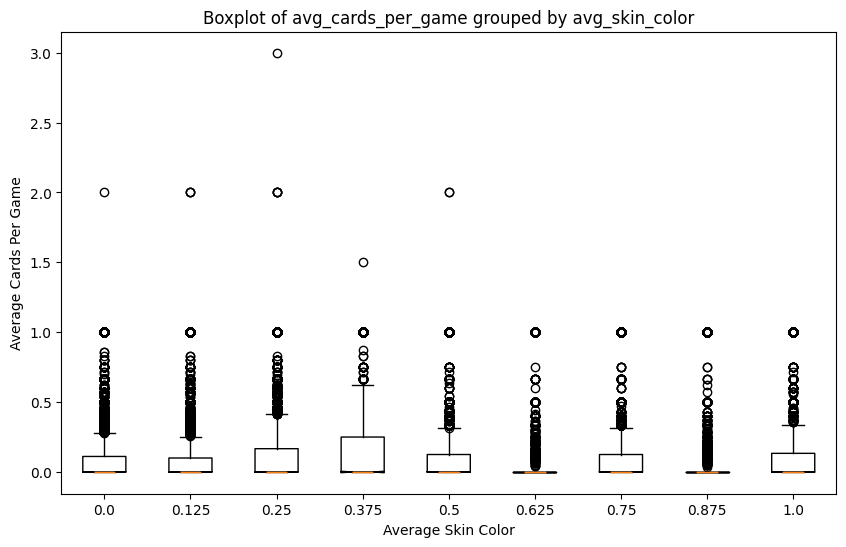

In [31]:
import matplotlib.pyplot as plt

grouped = boxplot_values.groupby('avg_skin_color')['avg_cards_per_game']

labels = sorted(boxplot_values['avg_skin_color'].unique())

data_for_boxplot = [grouped.get_group(label).values for label in labels]

plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=labels, notch=True)
plt.title('Boxplot of avg_cards_per_game grouped by avg_skin_color')
plt.xlabel('Average Skin Color')
plt.ylabel('Average Cards Per Game')
plt.show()

In [32]:
grouped = boxplot_values.groupby('avg_skin_color')['avg_cards_per_game']
grouped